# Object oriented plotting

## Prequisties
- simple plotting
- surface plotting
- object oriented programming
- loops
- functions
- containers
- numpy

So far, when presenting quantitative information in python, we have used `matplotlib` to build line graphs and surface plots using the following functionality:

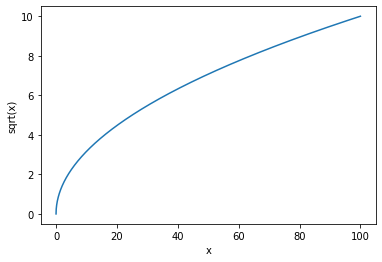

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# generate a numpy array, x, then take the 
# square-root of this array, y.

x = np.linspace(0,100,5000)
y = np.sqrt(x)

# label axes, then plot
# x against y

plt.xlabel('x')
plt.ylabel('sqrt(x)')
plt.plot(x,y)

# plt.show() to visualise our graph 

plt.show()

There is an alternate means of plotting in which we use python objects to build our plot with the following logic: 

A figure in `matplotlib` is divided into two kinds of objects.

- Figure object
- Axes object(s)

A `Figure` object can contain one or more axes objects. Each `Axes` represents one plot inside our whole figure. Rewriting the above using our new object-oriented logic would be done as follows:

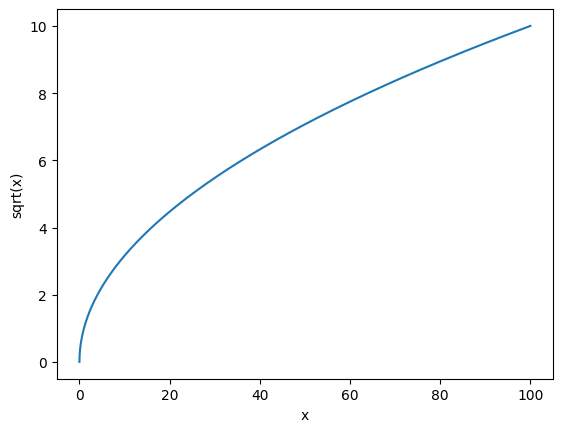

In [94]:
# produce a figure object, name it 'fig'
fig = plt.figure()

# add an `Axes` object
ax = fig.add_subplot()

# label axes, then plot x against y
ax.set_xlabel('x')
ax.set_ylabel('sqrt(x)')
ax.plot(x, y)

fig.show()

All we seem to have done here is added an extra step, to produce the same plot; the advantages of this method are not immediatley obvious. The rest of this section will use a chemical example in order to convince you of this methodology. 


## Application to chemistry, free energies of mixing

Metals are have found a great deal of application throughout society owing to their mechanical and electrical properties, but their usues are often limited dependent on the properties of a material. For example, copper is highly electronically conductive, but does not hae the mechanical strength of titanium. Alloying metals allows for the manipulation of the physical and chemical propeties of metals by mixing togther different metals. Alloying can increase resistance to oxidation, improve strength, conductivity, and melting point releative to the pure metals to be alloyed. Consider brass, often used in household fixtures, brasses have a greater resistance to corrosion than pure zinc or copper, the two major metals that constitute a brass alloy. The combination also has a low melting point allowing it to be easily cast into many different shapes and sizes. Steel, an alloy of carbon in iron is, again, more corrosion resistant than iron (iron of course, is highly susceptible to oxidation/rusting) and steel is valued the world over for its mechanical properties.

Whether or not two elements will alloy is determined by the free energy of mixing. We can evaluate this be considering the relative entropic and enthalpic contributions to alloying

$$
\Delta G = \Delta H - T \Delta S
$$

Consider alloying on an FCC lattice between two metals, $A$ and $B$. The entropy of alloying will be dominated by the vast number of configurations these atoms could be arranged in; the equation for configurational entropy in this case is

$$
S = -k_\mathrm{B}N [c \ln c + (1− c)\ln (1− c)]
$$

where $k_\mathrm{B}$ is the Boltzmann constant, $N$ is the number of sites available for substitution, $c$ is the ratio of sites occupied by atom A ($n_A$) and the available sites, i.e. $\dfrac{n_A}{N}$. 

The enthalpic contribution to the mixing energy will be dominated by the strengths of the various bonds that are in the alloy,

$$
H = \dfrac{1}{2} N Z [cV_{AA} + (1 - c) V_{BB} + c (1 - c) (2V_{AB}  - V_{AA} - V_{BB})]
$$
where $Z$ is the coordination number of the sites in the alloy, $V_{AA}$ is the strength of the A-A bond, $V_{BB}$ is the strength of the B-B bond, and $V_{AB}$ is the strength of the A-B bond.

Let's consider a mole of $A$, that is to be alloyed with $B$, and begin by defining the necessary constants and equations

In [95]:
# import the Boltzmann constant, Avagadro's number
# and the conversion factor between electron volts
# and Joules
from scipy.constants import k, N_A, physical_constants
joule_eV = physical_constants['joule-electron volt relationship'][0]

def entropy(n):
    """
    calculate configuration entropy as a function of number of atoms of B
    
    Args:
        n (float): Number of atoms of B
        
    Returns:
        S (float): configurational entropy of a 1 mol mixture of A and B
        
    """
    c =  n / N_A
    S =  (k * N_A) * ( c * np.log(c) + (1 - c) * np.log(1 - c) )
    return S

def enthalpy(n, v_aa, v_bb, v_ab):
    """
    calculate enthlapy of mixing
    
    Args:
        n (float): Number of atoms of B
        v_aa: bond strength of A-A
        v_bb: bond strength of B-B
        v_ab: bond strength of A-B
        
    Returns:
        H (float):  enthalpy of mixing for A and B
        
    """
    Z = 12     # because we are on an FCC lattice
    c =  n / N_A
    H = 0.5 * N_A * Z * (c * v_aa + (1 - c) * v_bb + c * (1 - c) * (2*v_ab - v_aa - v_bb))
    return H

# generate all numbers between 1 and N_A

N = np.linspace(1,N_A,10000)

mol_frac = N/N_A

With these constants and equations defined, we can plot $\Delta H$, $-T\Delta S$ and $\Delta G$ on the same plot, to assess whether we expect these metals to mix.

/home/alex/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/home/alex/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


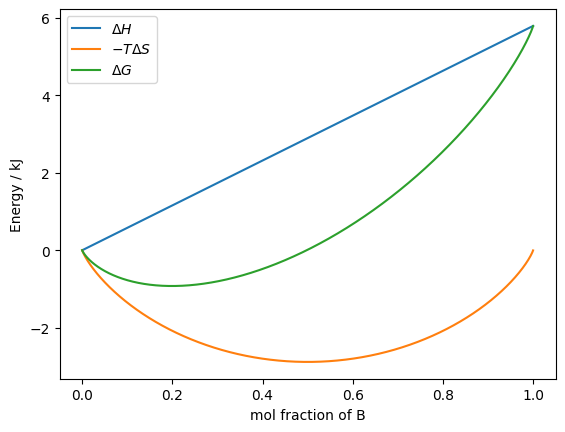

In [88]:
# define some bond strengths in
# electron volts, and convert to
# Joules,

a_a = ( -0.735 / joule_eV )
b_b = ( -0.725 / joule_eV )
a_b = ( -0.73 / joule_eV )

# temperature of alloying

T = 500

# Calculate S and H for all values
# in N, and for the given bond strengths

H = np.array([enthalpy(n,a_a,b_b,a_b) for n in N])
S = np.array([entropy(n) for n in N]) 

# Calculate delta S and Delta H and 
# convert to kilojoules, then calculate 
# delta G

delta_H =  (H[0] - H) * 1e-3
delta_S =  (S[0] - S) * 1e-3 
delta_G = delta_H-T*delta_S

# define our `Figure` and `Axes` objects

fig,ax = plt.subplots(1,1)
ax.plot(mol_frac, delta_H, label='$\Delta H$')
ax.plot(mol_frac, -T*delta_S, label='$-T \Delta S$')
ax.plot(mol_frac, delta_G, label='$\Delta G$')
ax.set_xlabel('mol fraction of B')
ax.set_ylabel('Energy / kJ')
ax.legend()

fig.show()

> ### a note on LateX
> you might have notice in this text book, that when an example uses a mathematical symbol, i.e. in the legend
> of the above plot, the relevent python string is surrounded by $ symbols
> this denotes "LateX" (pronounced lay-tek) is to be used to generate that string. For our purposes LateX should just be considered as 
> a means of accessing mathematical symbols in python strings. Some examples of LateX (which can also be used in markdown cells):

> \Delta $\rightarrow \Delta$   
> \delta $\rightarrow \delta$   
> \vec{\sigma} $\rightarrow \vec{\sigma}$   
> \frac{1}{2} $\rightarrow \frac{1}{2}$

In the plot above, we can see that we would expect these two metals to alloy at $500~\mathrm{K}$ as, despite the unfavourable enthalpy of the process, the entropy term is comparitivley large enough to bring about a minimum in free energy at $\sim 25\%$ B. This is because when the condition:

$$
V_\mathrm{AB} = \dfrac{V_\mathrm{AA} + V_\mathrm{BB}}{2}
$$

is met, the change in enthalpy is linear, as there is no strong preference for the formation of A-A or B-B bonds, and the alloy will form an ideal mixture. We will now use the new functionality we've discussed in matplotlib to compare this case, with the situation when

$$
V_\mathrm{AB} > \dfrac{V_\mathrm{AA} + V_\mathrm{BB}}{2}~~~~\mathrm{\&}~~~~V_\mathrm{AB} < \dfrac{V_\mathrm{AA} + V_\mathrm{BB}}{2}
$$

What we will do is define a `Figure` object with three subplots, which will each have one `Axes` object plotted on it. for each of the bond strength conditions, we will calculate the change in entropy and enthalpy, and plot them together on different subplots on the same _figure_. The comments will guide you through the process step by step.

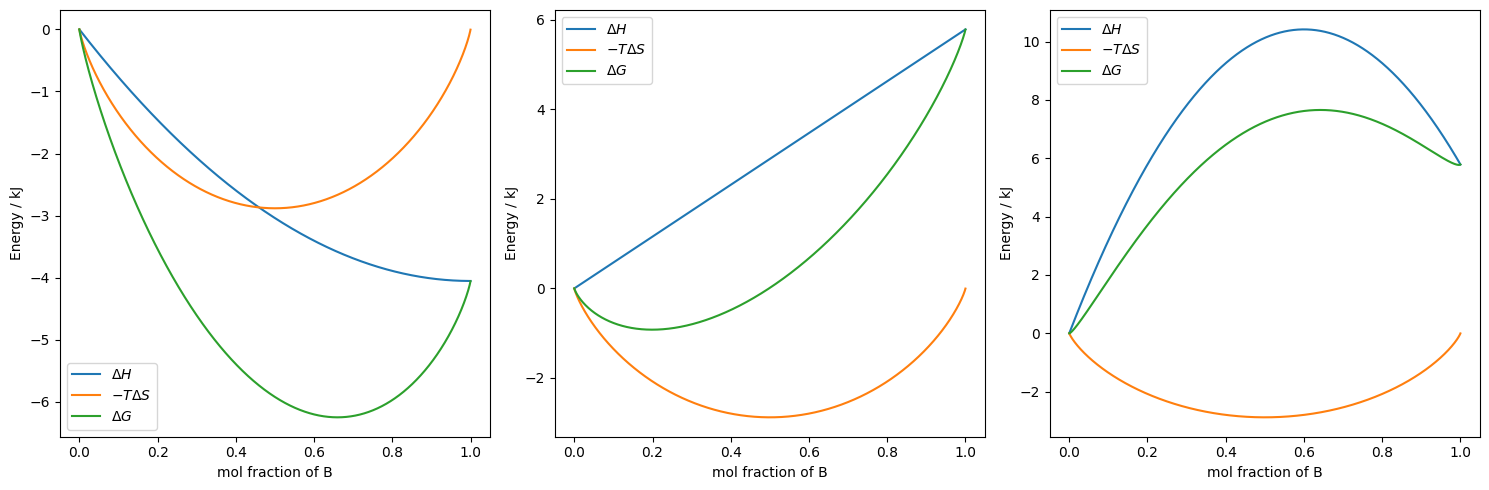

In [89]:
# define a list of lists of bond strengths that will cover the three scenarios
# discussed above

bond_strengths = [[-0.73 / joule_eV, -0.737 / joule_eV, -0.73 / joule_eV],
                  [-0.735 / joule_eV, -0.725 / joule_eV, -0.73 / joule_eV],
                  [-0.7 / joule_eV, -0.69 / joule_eV, -0.72 / joule_eV]]

# for each set of bond strengths, calculate the range of enthalpies
# associated with them

enthalpies = np.array([[enthalpy(n,bs[0],bs[1],bs[2]) for n in N] for bs in bond_strengths])

# define a `Figure` and set of associated
# `Axes` objects displayed as 1 row (first argument)
# with 3 columns (second argument) and a figsize
# to ensure our figure is not too small

fig,axs = plt.subplots(1,3,figsize=(15,5))

# for each set of enthalpies...

for index,H in enumerate(enthalpies):
    
    # ...set the index of the list 
    # to the current `Axes` object...
    
    ax = axs[index]
    
    # ...calulate arrays of delta values...
    
    delta_H =  (H[0] - H) * 1e-3
    delta_S =  (S[0] - S) * 1e-3 
    delta_G = delta_H-T*delta_S

    # ...plot the mol fraction of B
    # against each delta value, with a label...

    ax.plot(mol_frac, delta_H, label='$\Delta H$')
    ax.plot(mol_frac, -T*delta_S, label='$-T \Delta S$')
    ax.plot(mol_frac, delta_G, label='$\Delta G$')
    #ax.hlines(0,0,1,linewidth=0.75)
    #ax.set_xlim(0,1)
    
    # ...add axes labels and add a legend.
    
    ax.set_xlabel('mol fraction of B')
    ax.set_ylabel('Energy / kJ')
    ax.legend()

# visualise the figure

fig.tight_layout()
fig.show()

We can see from the above plots, that there are three distinct cases as we vary our bond strengths, however, as the graphs do not have a common y axis, it is not straightforward to directly compare the three. let's add a bit more code to help us compare. The code in the cell below is identical to the cell above, except for the commented changes.

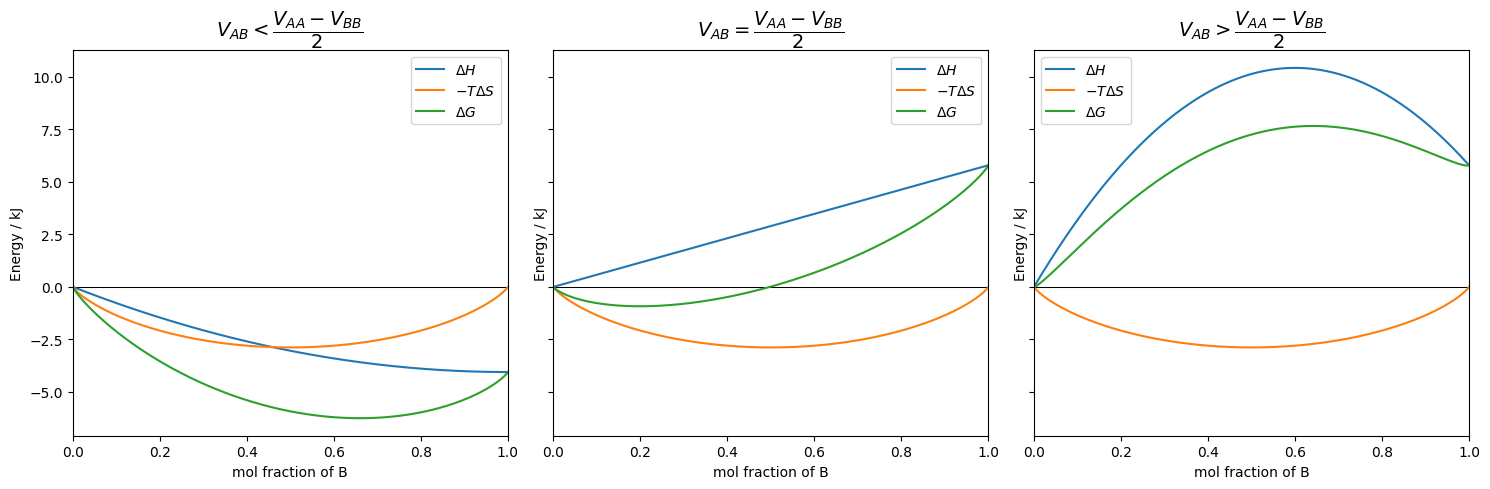

In [90]:
bond_strengths = [[-0.73 / joule_eV, -0.737 / joule_eV, -0.73 / joule_eV],
                  [-0.735 / joule_eV, -0.725 / joule_eV, -0.73 / joule_eV],
                  [-0.7 / joule_eV, -0.69 / joule_eV, -0.72 / joule_eV]]

enthalpies = np.array([[enthalpy(n,bs[0],bs[1],bs[2]) for n in N] for bs in bond_strengths])

# add an argument when we define our `Figure` and `Axes` objects
# that all sub plots in the figure should share common y axis 
# values. 

fig,axs = plt.subplots(1,3,figsize=(15,5), sharey='row')


for index,H in enumerate(enthalpies):
    
    ax = axs[index]
    
    delta_H =  (H[0] - H) * 1e-3
    delta_S =  (S[0] - S) * 1e-3 
    delta_G = delta_H-T*delta_S

    ax.plot(mol_frac, delta_H, label='$\Delta H$')
    ax.plot(mol_frac, -T*delta_S, label='$-T \Delta S$')
    ax.plot(mol_frac, delta_G, label='$\Delta G$')
    
    # restrict the x axis to values between
    # 0 and 1, and add a horizontal line at
    # y = 0 to help show the point at which
    # the energy contributions become negative
    
    ax.set_xlim(0,1)
    ax.hlines(0,0,1,linewidth=0.75)

    
    ax.set_xlabel('mol fraction of B')
    ax.set_ylabel('Energy / kJ')
    ax.legend()

# the subplots do not have to be accessed in a loop,
# they can be modified explicitly like so:

axs[0].set_title('$V_{AB} < \dfrac{V_{AA} - V_{BB}}{2}$',fontsize=14)
axs[1].set_title('$V_{AB} = \dfrac{V_{AA} - V_{BB}}{2}$',fontsize=14)
axs[2].set_title('$V_{AB} > \dfrac{V_{AA} - V_{BB}}{2}$',fontsize=14)

fig.tight_layout()
fig.show()

Now we have our graphs plotted in a way that allows for simple comparison, we can discuss the implications of each bonding scenario:

- if $V_{AB} < \dfrac{V_{AA} - V_{BB}}{2}$ then either an ordered solid solution or a compound is
likely to form: A and B atoms preferentially sit next to eachother as opposed to mixing randomly.

- $V_{AB} > \dfrac{V_{AA} - V_{BB}}{2}$ then a mixture is unlikely to form, as A and B prefer to remain in their own crystals
as opposed to alloying.

In many ways, the easiest 'dial to turn' during the synthesis of an alloy is temperature, we will now consider how each of the above scenarios is affected by an increasing synthesis temperature. First, lets explore how we might plot such a figure. The cells below will guide you through the process of plotting a $3 \times 3$ grid of subplots in a single figure.

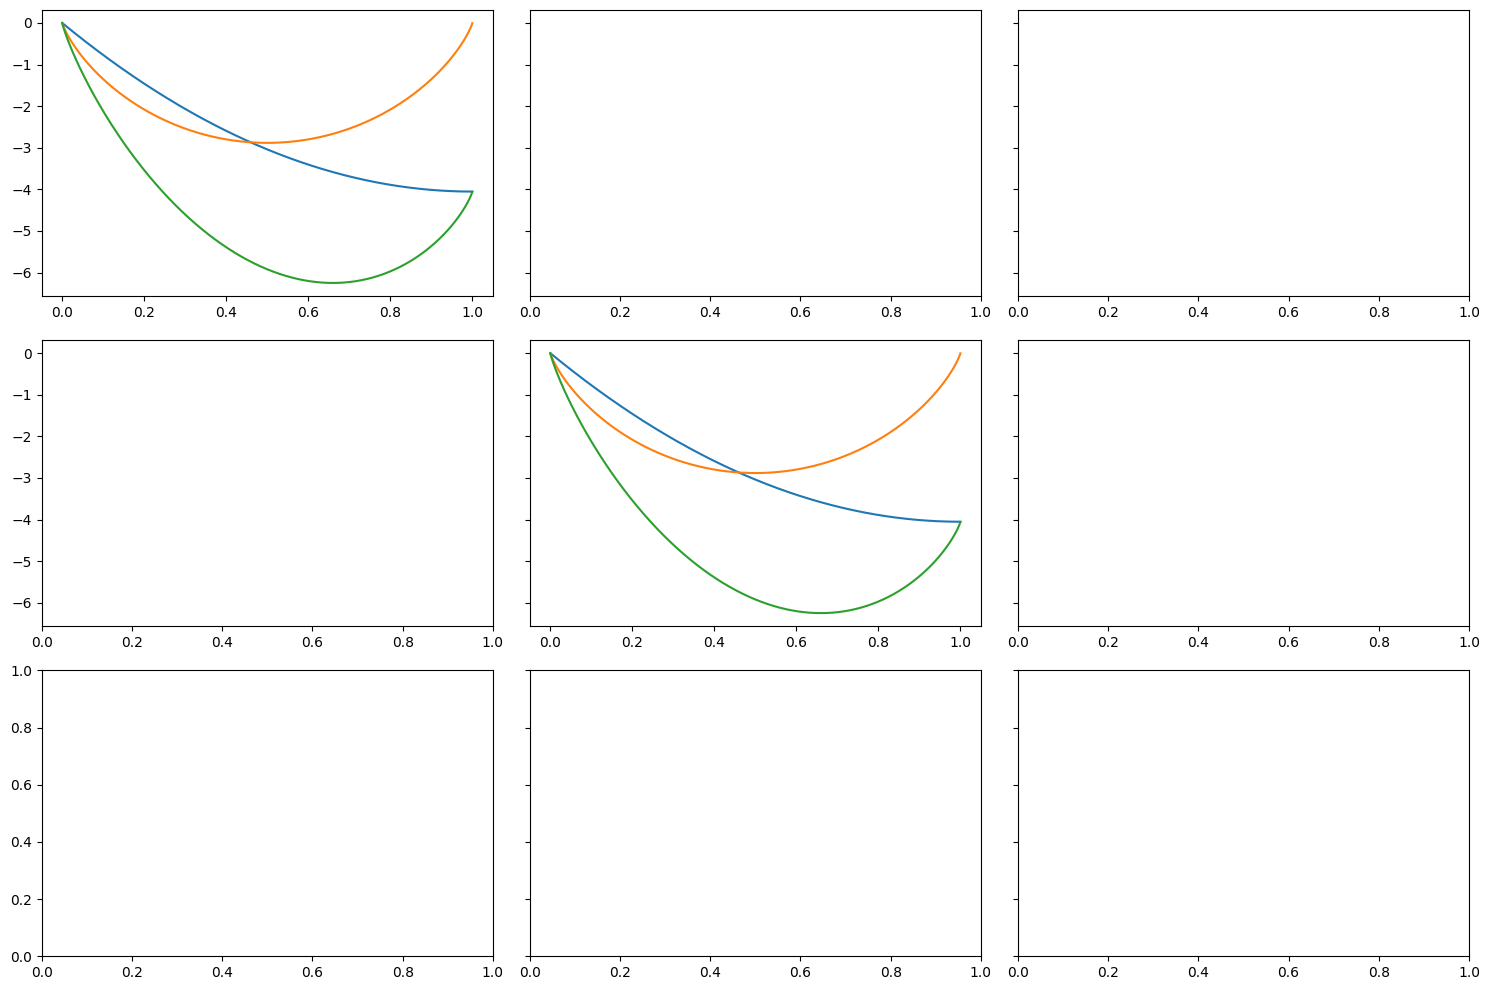

In [93]:
# in this case, we are defining a 3x3
# grid of plots as we would like to compare
# three bonding strength scenarios at a range of
# temperatures

fig,axs = plt.subplots(3,3,figsize=(15,10), sharey = 'row')

# We now index which `Axes`
# we would like to modify 
# using a list, rather than
# a single integer, so the
# top left subplot would be accessed
# using the list [0,0]

ax = axs[0,0]
delta_H = (enthalpies[0][0] - enthalpies[0]) * 1e-3
delta_G = delta_H - T * delta_S
ax.plot(mol_frac, delta_H)
ax.plot(mol_frac, -T*delta_S)
ax.plot(mol_frac, delta_G)

# and to acess the middles `Axes` object
# we use the [1,1] index of the
# list axs

ax = axs[1,1]
ax.plot(mol_frac, delta_H)
ax.plot(mol_frac, -T*delta_S)
ax.plot(mol_frac, delta_G)

fig.show()
fig.tight_layout()

Let's take this approach to show both the effect of bond strength, and temperature on the free energy of mixing.

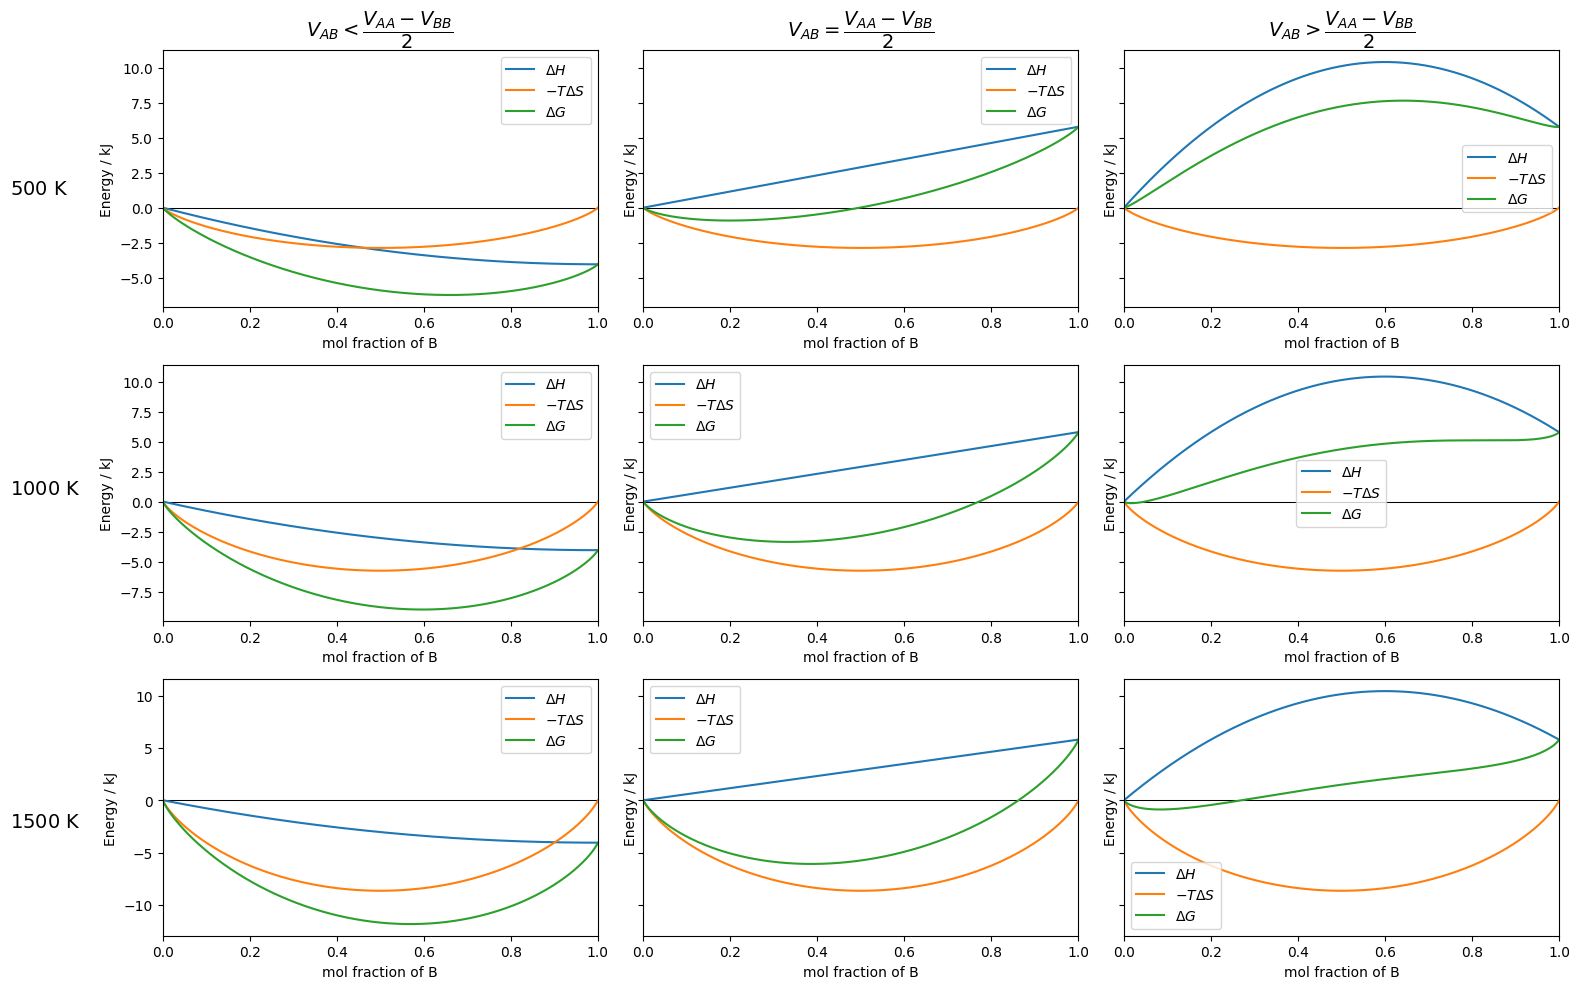

In [99]:
# define a list of alloying temperatues
# of interest

temperatures = [500,1000,1500]

# define our 3 by 3 grid of 
# plots as above

fig,axs = plt.subplots(3,3,figsize=(15,10), sharey = 'row')

# loop over both all the temperatues
# and enthalpies and enumarate the lists...

for t_index,T in enumerate(temperatures): 
    for h_index,H in enumerate(enthalpies):
        
        # assing the position in the
        # grid of plots by the temperature 
        # index, and enthalpy idex
        
        ax = axs[t_index,h_index]
        
        # calculate relevant delta 
        # values
        
        delta_H = (H[0] - H) * 1e-3
        delta_G = delta_H - T * delta_S
        
        # plot `Axes` objects
        
        ax.plot(mol_frac,delta_H,label='$\Delta H$')
        ax.plot(mol_frac,-T*delta_S,label='$-T\Delta S$')
        ax.plot(mol_frac,delta_G,label='$\Delta G$')
        ax.hlines(0,0,1,linewidth=0.75)
        ax.set_xlim(0,1)
        ax.set_xlabel('mol fraction of B')
        ax.set_ylabel('Energy / kJ')
        ax.legend()
        
# add titles to the columns that show
# the relevant bonding conditions
        
axs[0,0].set_title('$V_{AB} < \dfrac{V_{AA} - V_{BB}}{2}$',fontsize=14)
axs[0,1].set_title('$V_{AB} = \dfrac{V_{AA} - V_{BB}}{2}$',fontsize=14)
axs[0,2].set_title('$V_{AB} > \dfrac{V_{AA} - V_{BB}}{2}$',fontsize=14)

# add row-wise labels to the figure 
# indicate what temeprature is 
# important

fig.text(-0.05,4/5,'$500~$K',fontsize=14)
fig.text(-0.05,1/2,'$1000~$K',fontsize=14)
fig.text(-0.05,1/6,'$1500~$K',fontsize=14)

# plot the figure

fig.tight_layout()
fig.show()

Scientifically, perhaps the starkest difference seen with changing temperature, is the $V_{AB} > \dfrac{V_{AA} - V_{BB}}{2}$ case: as we increase temperatures, the free energy of mixing becones negative for small mole fractions of B, suggesting that a certain level of mixing is possible if the synthesis temperatures are increased.

### Excercise

1. Revisit the simple plots chapter, plot the radial probability of the $l =  1,2,3$ orbitals on three subplots on the same figure, one for $l=1$, one for $l=2$ and one for $l=3$  


In [96]:
# Enter your code here

2. Replot the $3\times3$ free energies of mxing below, and using the `np.argmin` and `ax.vlines` function, plot a line orginating on the x axis indicating minimum in each $\Delta G$ curve is.

In [97]:
# Enter your code here

3. Altering only one line of code, change the orientation of the $3\times3$ plot of free energy curves so that the columns vary with temperature, and the rows with bonding condition.

### Appendix: Plot customisation

You can change almost every facet of a `matplotlib` figure. Below is an example of how this can be done by modifying the `rcParams` of a plot. These ar just examples; explore to see how much you can chage, remembering that the primary aim of all plots should be the effective conveyance of information.

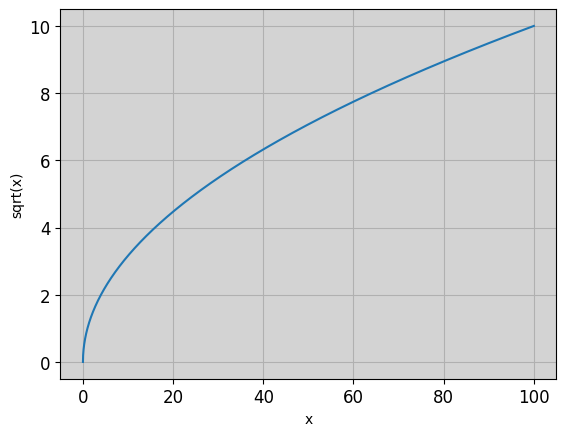

In [105]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.facecolor'] = 'lightgrey'

# produce a figure object, name it 'fig'
fig = plt.figure()

# add an `Axes` object
ax = fig.add_subplot()

# label axes, then plot x against y
ax.set_xlabel('x')
ax.set_ylabel('sqrt(x)')
ax.plot(x, y)

fig.show()
fig.show()

mpl.rcParams.update(mpl.rcParamsDefault)